# Ridge & Lasso Regression Example

In [38]:
# necessary functions we'll need
import math
import random
import numpy as np
import matplotlib.pyplot as plt

'''
x_data: 2D array of inputs (each row representing a single data point)
    if 1D array of inputs is passed, the function will automatically convert it into 2D where each row is its own 1D array of size 1
y_data: 1D array of outputs
alpha: used for learning rate of regression model
epochs: number of simulation runs
params: list of 1+n scalars used to get prediction value (y-hat) where n is the # of columns
regularization: if not blank, set it to "L1" or "L2"
lambda_const: constant value to use for regularization penalty

returns the refined parameters & r^2
'''
def linear_regression(x_data, y_data, alpha = 0.02, epochs = 100, params = [], regularization = '', lambda_const = 1):

    # prepping data here
    # converts x_data from 1D to 2D if necessary
    if not isinstance(x_data[0], list):
        x_data = [[row] for row in x_data]

    # if no parameters were passed, set them equal to 0
    if len(params) == 0:
        params = [0 for i in range(len(x_data[0]))]
        params.append(0) # adding extra 0 for the bias

    n = len(x_data)

    # returns y-hat
    def prediction(input_list):
        result = params[0] # the bias

        for i in range(len(input_list)):
            result += params[i + 1] * input_list[i] # coefficient * input
        
        return result # y-hat
    
    # returns sum of residuals
    def sum_residuals(multiplier_index = -1):
        
        multipliers = [1 for i in range(len(x_data))] if multiplier_index == -1 else [row[multiplier_index] for row in x_data]

        sum_error = 0

        for i in range(len(x_data)):
            sum_error += (y_data[i] - prediction(x_data[i]))*multipliers[i]

        return sum_error



    # running simulations and updating parameters here
    for epoch in range(epochs):
        params[0] += 2 * alpha * sum_residuals() / n # updating bias term

        # updating the coefficient terms
        for i in range(1, len(params)):
            reg_penalty = 0

            if regularization.upper() == 'L1': # lasso regression
                reg_penalty = alpha * lambda_const * np.sign(params[i])
            elif regularization.upper() == 'L2': # ridge
                reg_penalty = 2 * alpha * lambda_const * params[i]
            
            params[i] += (2 * alpha * sum_residuals(i - 1) / n) - reg_penalty

    return params

actual function: y = 3.2534894043859763 + 1.3595587792326815x


C:\Users\alfon\AppData\Local\Temp\ipykernel_26876\3161437850.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'actual function: y = {float(actual_a)} + {float(actual_b)}x')
C:\Users\alfon\AppData\Local\Temp\ipykernel_26876\3161437850.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


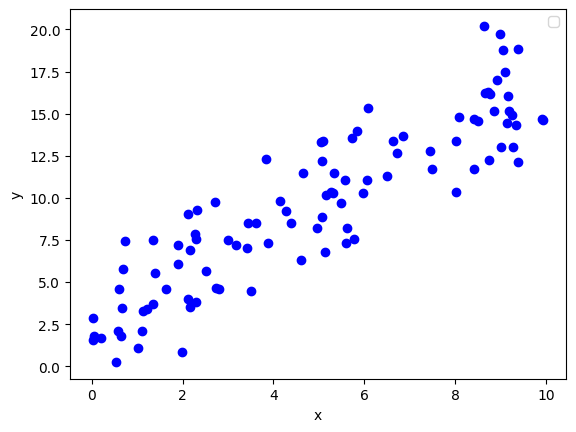

In [5]:
# creating our data points

mu = 0
sigma = 2.3
num_samples = 100

rng = np.random.default_rng()
sample_differences = rng.normal(loc=mu, scale=sigma, size=num_samples)




actual_a = np.random.normal(loc=5, scale=1.2, size=1)
actual_b = np.random.normal(loc=0, scale=2.3, size=1)
actual = lambda x: actual_a[0] + (actual_b[0] * x)

print(f'actual function: y = {float(actual_a)} + {float(actual_b)}x')

df_x = [random.uniform(0, 10) for i in range(num_samples)]
df_y = [actual(df_x[i]) + sample_differences[i] for i in range(num_samples)]



plt.scatter(df_x, df_y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')

plt.show()

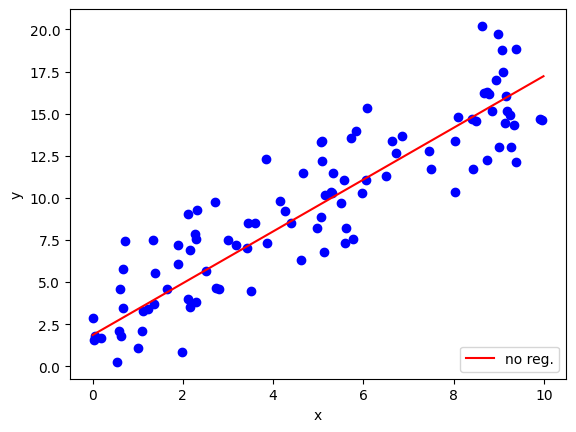

In [39]:
# running linear regression without regularization

num_iterations = 100
no_reg_params = linear_regression(df_x, df_y, epochs=num_iterations)

# plotting regression line (no regularization)

x_list = [x/100 for x in range(0, 1000)]
no_reg = [no_reg_params[0] + (x * no_reg_params[1]) for x in x_list]

plt.scatter(df_x, df_y, color='blue')
plt.plot(x_list, no_reg, color='red', label='no reg.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

plt.show()

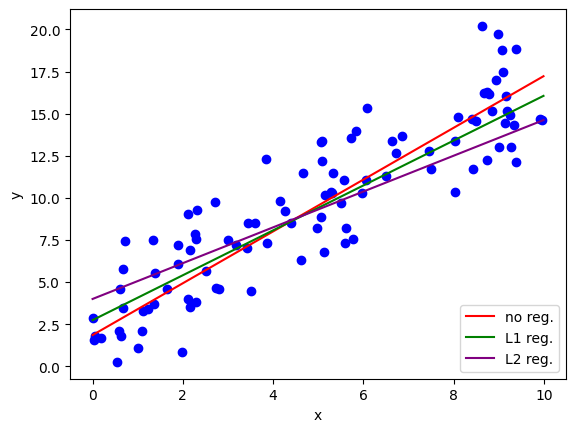

In [40]:
# running linear regression using L1 & L2 regularization

lambda_const = 5 # mess around with lambda

l1_reg_params = linear_regression(df_x, df_y, epochs=num_iterations, regularization='L1', lambda_const=lambda_const)
l2_reg_params = linear_regression(df_x, df_y, epochs=num_iterations, regularization='L2', lambda_const=lambda_const)

l1_reg = [l1_reg_params[0] + (x * l1_reg_params[1]) for x in x_list]
l2_reg = [l2_reg_params[0] + (x * l2_reg_params[1]) for x in x_list]

plt.scatter(df_x, df_y, color='blue')
plt.plot(x_list, no_reg, color='red', label='no reg.')
plt.plot(x_list, l1_reg, color='green', label='L1 reg.')
plt.plot(x_list, l2_reg, color='purple', label='L2 reg.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

plt.show()